# Statistical estimation of clear sky signal using SVD

In [1]:
from clearsky.main import StatisticalClearSky
import numpy as np
import pandas as pd
df = pd.read_pickle('data/master_dataset.pkl').fillna(0)
df = df.loc['2015-07-15':'2017-07-14']
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')
plt.rc('figure', figsize=(50.0, 10.0))

We isolate a single AC power single for a single inverter to performance clear sky estimation on.

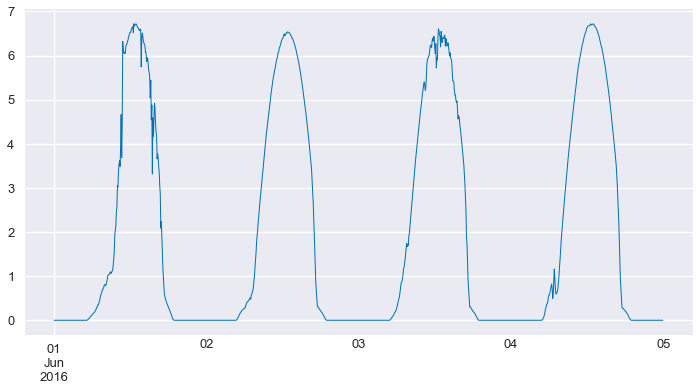

In [2]:
df['S47'].loc['6/1/16':'6/4/16'].plot(linewidth=1, figsize=(12, 6))

In [3]:
scs = StatisticalClearSky(df['S47'])

This method utilizes SVD decomposition to generate eigenvectors representing 24 hours of 5-minute data.

In [4]:
%time scs.get_eigenvectors()

CPU times: user 83 ms, sys: 77.2 ms, total: 160 ms
Wall time: 87.3 ms


<Container object of 3 artists>

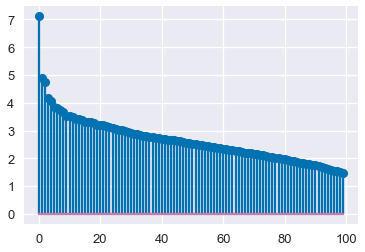

In [16]:
plt.stem(np.log(scs.D[:100]))

Text(0.5,0,u'Vector index')

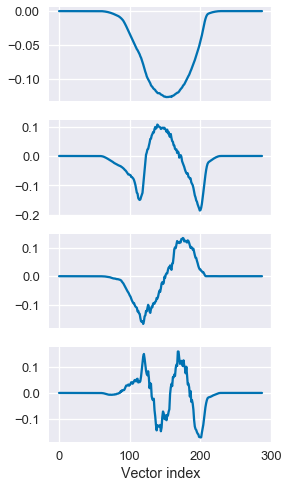

In [6]:
N = 4
fig, axes = plt.subplots(nrows=N, figsize=(4,8), sharex=True)
for i in xrange(N):
    axes[i].plot(scs.U[:, i])
plt.xlabel('Vector index')

In [7]:
np.diag(scs.D).dot(scs.P[:288,:]).shape

(288, 731)

Individual days from the dataset can be reconstructed via the solar eigenvectors. Using the eigenvectors associated with the largest 100 eigenvalues, almost no information about the original signal is lost

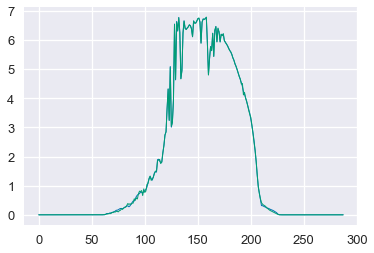

In [8]:
scs.reconstruct_day(day=327, n=100)

Using a smaller number of eigenvector creates smoothing.

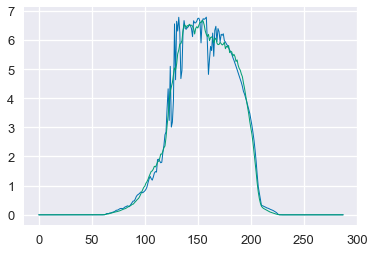

In [9]:
scs.reconstruct_day(day=327, n=5)

Clear sky estimation is performed via estimating new values for the scale factors on the first five eigenvectors. The first fit is an envelope fit, while the last four are smoothing fits on just the clear sky days identified by the first fit. A Huber cost function is used for resilliancy to outliers. More explanation will be given in the future. A view of the fits is given below.

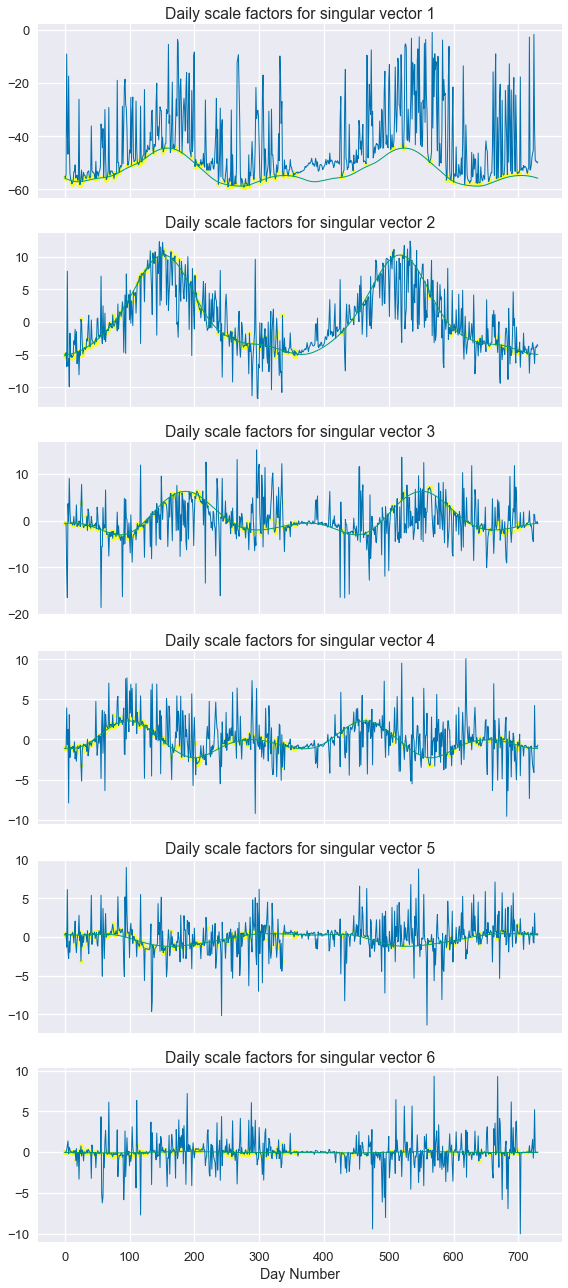

In [10]:
_ = scs.make_clearsky_model(n=6, plot=True)

We can access the clearsky model as a method on this class. Below we compare a sunny day with it's low-dimensionality reconstruction and the clear sky model.

Text(0.5,0,u'5-minute intervals')

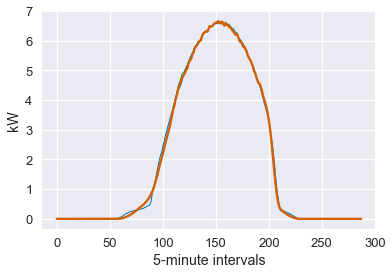

In [11]:
DAY = 337
scs.reconstruct_day(DAY, n=7)
estimates = scs.estimate_clearsky(np.s_[DAY:DAY+1])
for i in xrange(estimates.shape[1]):
    plt.plot(estimates[:, i])
plt.ylabel('kW')
plt.xlabel('5-minute intervals')
#plt.legend(['signal', 'low-dim reconstruction', 'clear sky'])

Below, we generate the clear sky signal for a cloudy day, from the same week as the previous example.

Text(0.5,0,u'5-minute intervals')

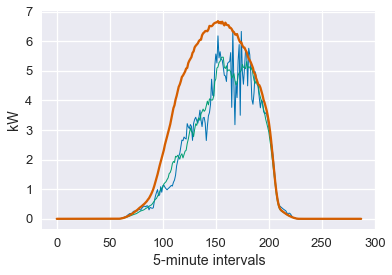

In [12]:
DAY = 330
scs.reconstruct_day(DAY, n=7)
estimates = scs.estimate_clearsky(np.s_[DAY:DAY+1])
for i in xrange(estimates.shape[1]):
    plt.plot(estimates[:, i])
plt.ylabel('kW')
plt.xlabel('5-minute intervals')
#plt.legend(['signal', 'low-dim reconstruction', 'clear sky'])

Here we inspect a mostly sunny day in the winter. Note that the shape of the clear sky signal has changed drastically. We observe that the system is impacted by nearby object shading in the morning in the winter, which is picked up in the clear sky signal generated by the algorithm.

Text(0.5,0,u'5-minute intervals')

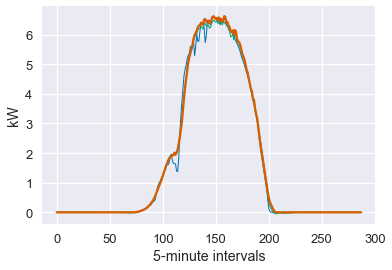

In [13]:
DAY = 120
scs.reconstruct_day(DAY, n=7)
estimates = scs.estimate_clearsky(np.s_[DAY:DAY+1])
for i in xrange(estimates.shape[1]):
    plt.plot(estimates[:, i])
plt.ylabel('kW')
plt.xlabel('5-minute intervals')
#plt.legend(['signal', 'low-dim reconstruction', 'clear sky'])

Here is a similar comparison on a partially cloudy spring day.

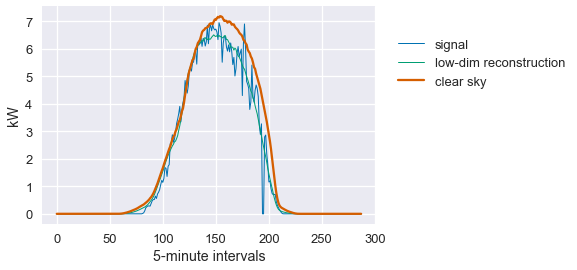

In [14]:
DAY = 231
scs.reconstruct_day(DAY, n=5)
estimates = scs.estimate_clearsky(np.s_[DAY:DAY+1])
for i in xrange(estimates.shape[1]):
    plt.plot(estimates[:, i])
plt.ylabel('kW')
plt.xlabel('5-minute intervals')    
plt.legend(['signal', 'low-dim reconstruction', 'clear sky'], loc=(1.05,.6))